In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen =ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_datagen.flow_from_directory(
    r'C:\Users\pc\Desktop\CN lab\TRAIN_SET\TRAIN_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
x_test = test_datagen.flow_from_directory(
    r'C:\Users\pc\Desktop\CN lab\TEST_SET-20221101T044129Z-001\TEST_SET' ,target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [4]:
print (x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [5]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [6]:
from collections import Counter as c
c(x_train.labels)



Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [8]:
import numpy as np

In [9]:
import tensorflow

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras import layers

In [12]:
from tensorflow.keras.layers import Dense, Flatten

In [13]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

In [19]:
#model.add(Dense(output_dim=128,activation='relu',init='random_uniform'))

In [20]:
#model.add(Dense(output_dim=1,activation='sigmoid',init='random_uniform'))

In [21]:
classifier = Sequential()

In [22]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))

 




In [24]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))


In [25]:
classifier.add(Flatten())

In [26]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [27]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [28]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
classifier.fit_generator(
         generator=x_train,steps_per_epoch = len(x_train),
         epochs=10, validation_data=x_test,validation_steps = len(x_test))

C:\Users\pc\AppData\Local\Temp\ipykernel_2480\1881611701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
526/526 [==============================] - 90s 165ms/step - loss: 0.2251 - accuracy: 0.9166 - val_loss: 0.0283 - val_accuracy: 0.9905
Epoch 2/10
526/526 [==============================] - 19s 37ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0374 - val_accuracy: 0.9839
Epoch 3/10
526/526 [==============================] - 20s 37ms/step - loss: 4.6636e-04 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 0.9744
Epoch 4/10
526/526 [==============================] - 20s 38ms/step - loss: 1.0319e-04 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9820
Epoch 5/10
526/526 [==============================] - 20s 37ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/10
526/526 [==============================] - 20s 38ms/step - loss: 8.3048e-05 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
526/526 [==============================] - 20s 38ms/step - loss: 4.4881e-05 - accuracy: 1.0000 - val_loss: 0.001

In [30]:
classifier.save('nutrition.h5')

In [31]:
from tensorflow.keras.models import load_model

In [32]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image 
model = load_model("nutrition.h5")

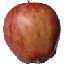

In [39]:
img = image.load_img(r"C:\Users\pc\Desktop\CN lab\TEST_SET-20221101T044129Z-001\TEST_SET\APPLES\3_100.jpg", grayscale=False,target_size= (64,64))
img


In [40]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x)) 
pred

1/1 [==============================] - 0s 28ms/step


3

In [41]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'APPLES'